In [25]:
# importing dependancies
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Magic words ~ooo
%matplotlib inline

In [26]:
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [27]:
coordinates = list(lat_lngs)

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [28]:
### Generate random cities

# Need to install citipy (command: pip install citipy)

from citipy import citipy

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [29]:
# import requests and load weather API key

import requests
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
#units=Imperial changes units.  make that shit metric yo.

city_url = url + "&q=" + "Boston"
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=55ff2b9fb68b3de716193ff81b894734&q=Boston'

In [30]:
weather_response = requests.get(city_url)
weather_json = weather_response.json()

#parses data in JSON format
weather_json

#displays home row keys of API database
weather_json.keys()

#for vague keys, look at values and pass key through to see whats inside

weather_json.get("main")

{'temp': 22.8,
 'feels_like': 23.2,
 'temp_min': 20.09,
 'temp_max': 24.49,
 'pressure': 1017,
 'humidity': 79}

In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [32]:
# Display data structure
weather_json

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 22.8,
  'feels_like': 23.2,
  'temp_min': 20.09,
  'temp_max': 24.49,
  'pressure': 1017,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 5.66, 'deg': 190},
 'clouds': {'all': 20},
 'dt': 1659581608,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1659519526,
  'sunset': 1659571320},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [33]:
# request specific data from dataframe

boston_data = weather_json
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 22.8,
  'feels_like': 23.2,
  'temp_min': 20.09,
  'temp_max': 24.49,
  'pressure': 1017,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 5.66, 'deg': 190},
 'clouds': {'all': 20},
 'dt': 1659581608,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1659519526,
  'sunset': 1659571320},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [34]:
lat = boston_data["coord"]["lat"]
long = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, long, max_temp, humidity, clouds, wind)

42.3584 -71.0598 24.49 79 20 5.66


In [35]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-08-04 02:53:28'

In [36]:
### practice linear regression

from scipy.stats import linregress

# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [37]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

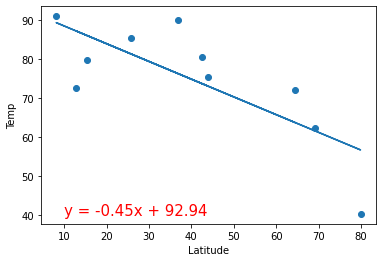

In [39]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values)
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()